the weighted averaging property of the n x Fm moving averages has application in smoothing data with seasonality in order to generate estimates of trend cycles.

For example, given quarterly observations we can apply the 2 x F4 MA to smooth the data. 

for monthly data, 2 x F12 would generate a smooth series as an estimate of the trend-cycle component. For data with odd periodicity such as weekly observations, taking F(2k+1) MA, for example F7 for weekly data removes seasonality

developed a methodology of stationarizing a non-stationary time series using seasonal MA and seasonal differences. 
We used the seasonal moving average as an estimate of the trend-cycle component and
computed periodic differences on the residuals left by the MA.

In [3]:
from __future__ import print_function
import os
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Set current directory and work relative to it
os.chdir('E:/gitlab/project_on_python/deep time series forcasting/Practical-Time-Series-Analysis-master')

In [5]:
#Read dataset into a pandas.DataFrame
beer_df = pd.read_csv('datasets/quarterly-beer-production-in-aus-March 1956-June 1994.csv')
beer_df.index = beer_df['Quarter']

In [6]:
#Display shape of the dataset
print('Shape of the dataframe:', beer_df.shape)

Shape of the dataframe: (155, 2)


In [7]:
#Show top 10 rows
beer_df.head(10)

,Quarter,Quarterly beer production in Australia: megalitres. March 1956 ? June 1994
Quarter,,
1956Q1,1956Q1,284.4
1956Q2,1956Q2,212.8
1956Q3,1956Q3,226.9
1956Q4,1956Q4,308.4
1957Q1,1957Q1,262.0
1957Q2,1957Q2,227.9
1957Q3,1957Q3,236.1
1957Q4,1957Q4,320.4
1958Q1,1958Q1,271.9


In [8]:
#Rename the 2nd column
beer_df.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994':
                        'Beer_Prod'
                       },
               inplace=True
              )

In [9]:
#Remove missing values
missing = (pd.isnull(beer_df['Quarter'])) | (pd.isnull(beer_df['Beer_Prod']))
print('Number of rows with at least one missing values:', missing.sum())
beer_df = beer_df.loc[~missing, :]
print('Shape after removing missing values:', beer_df.shape)

Number of rows with at least one missing values: 1
Shape after removing missing values: (154, 2)


In [32]:
#In order to remove seasonal patterns let us calculate 2X4 quarter moving average
MA4 = beer_df['Beer_Prod'].rolling(window=4).mean() #lebar convolusi
TwoXMA4 = MA4.rolling(window=4).mean() #symmetry, weighted sum of observations from the original time series
TwoXMA4 = TwoXMA4.loc[~pd.isnull(TwoXMA4)]

<IPython.core.display.Javascript object>


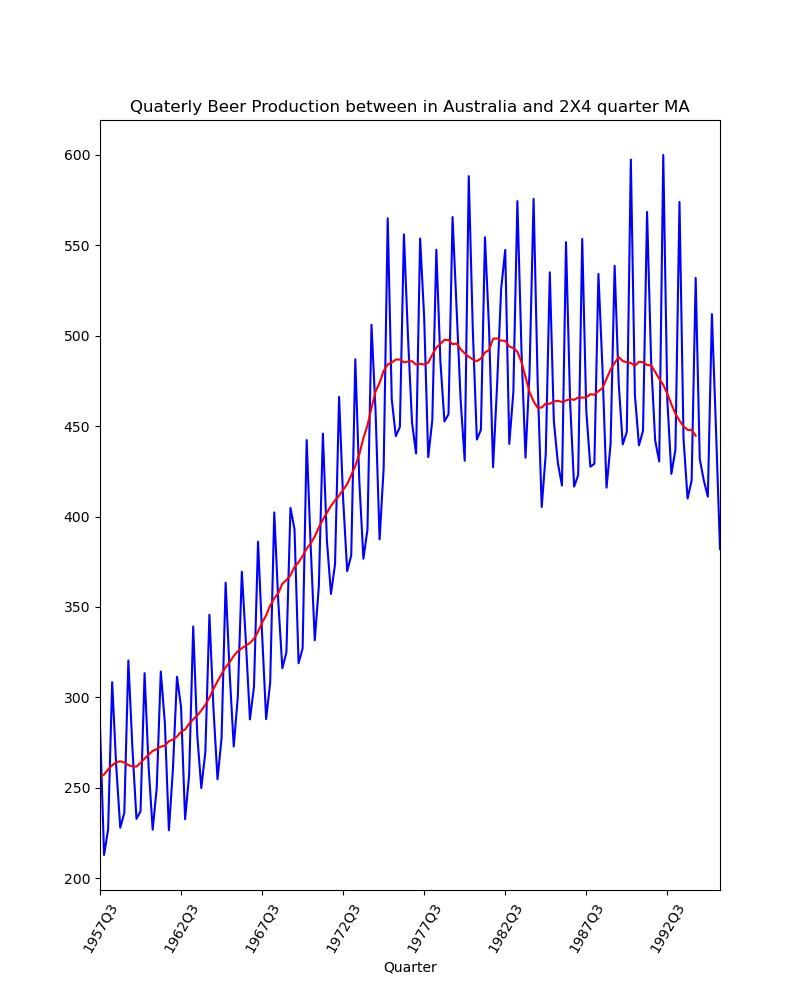

In [33]:
#Let's plot the original time series and the seasonal moving averages
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(1,1,1)
beer_df['Beer_Prod'].plot(ax=ax, color='b', linestyle='-')
TwoXMA4.plot(ax=ax, color='r', linestyle='-')
plt.xticks(rotation=60)
ax.set_title('Quaterly Beer Production between in Australia and 2X4 quarter MA')
# plt.savefig('plots/ch2/B07887_02_16.png', format='png', dpi=300)
plt.show()

The original time series on the quarterly beer productions has trend as well as seasonality and therefore is not stationary. Let us see if we can stationarize the time series by first removing the trend component and then taking seasonal differences

In [23]:
#Let's compute the residuals after removing the trend
residuals = beer_df['Beer_Prod']-TwoXMA4
residuals = residuals.loc[~pd.isnull(residuals)]

<IPython.core.display.Javascript object>


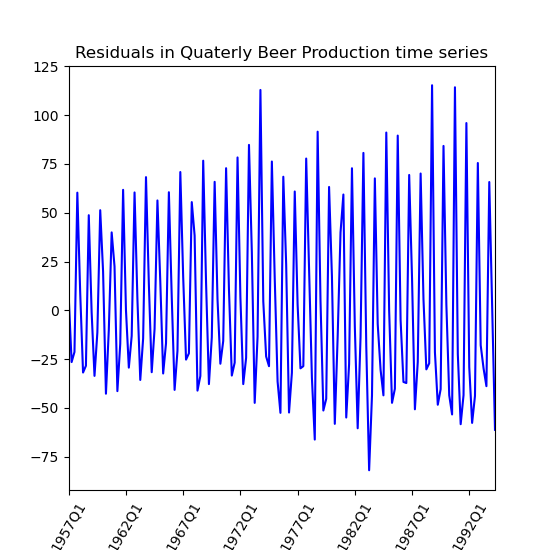

In [25]:
#Let's plot the residuals
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
residuals.plot(ax=ax, color='b', linestyle='-')
plt.xticks(rotation=60)
ax.set_title('Residuals in Quaterly Beer Production time series')
# plt.savefig('plots/ch2/B07887_02_17.png', format='png', dpi=300)
plt.show()

At this point we will check whether the residuals are already stationarized (though unlikely!) by plotting the autocorrelation function along with the 99% confidence intervals.

In [26]:
from pandas.plotting import autocorrelation_plot

<IPython.core.display.Javascript object>


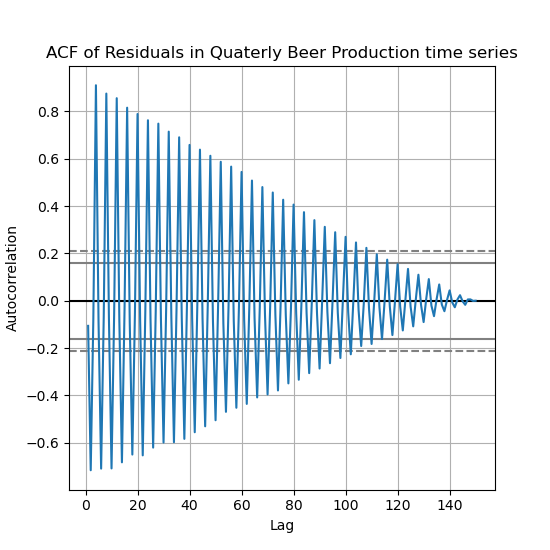

In [28]:
#Let's plot the autocorrelation function of the residuals
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
autocorrelation_plot(residuals, ax=ax)
ax.set_title('ACF of Residuals in Quaterly Beer Production time series')
# plt.savefig('plots/ch2/B07887_02_18.png', format='png', dpi=300)
# autocorrelation_plot(residuals)
plt.show()

Clearly, the residuals have a strong autocorrelation with the ACF jumping outside the confidence intervals for several values of lags. So we would need to take seasonal difference on the residuals. The period of seasonality can be determined based on the fact that the original data is obtained from all quarters of the years and shows seasonality of the quarter.

This means that the residuals in quarter one of a year is close in magnitude to the residuals from quarter one of the preceding and succeeding years

In [29]:
#Let's compute quarterly differecing to remove quaterly seasonality
residuals_qtr_diff = residuals.diff(4)

In [30]:
#Remove null values
residuals_qtr_diff = residuals_qtr_diff.loc[~pd.isnull(residuals_qtr_diff)]

<IPython.core.display.Javascript object>


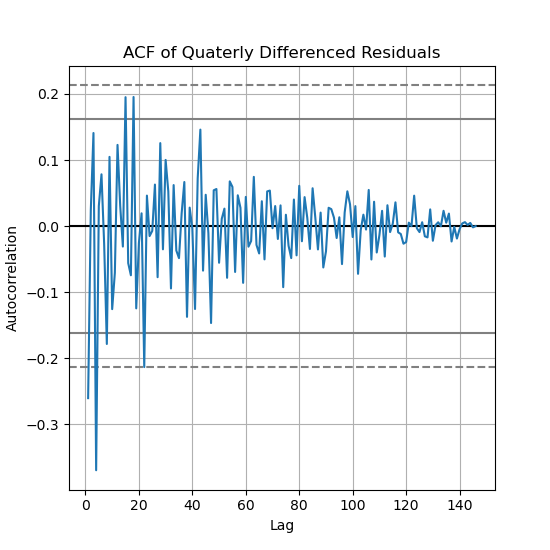

In [31]:
#Let's plot the autocorrelation function of the residuals
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
autocorrelation_plot(residuals_qtr_diff, ax=ax)
ax.set_title('ACF of Quaterly Differenced Residuals')
# plt.savefig('plots/ch2/B07887_02_19.png', format='png', dpi=300)
plt.show()

esides, the ACF falls outside the 99% confidence intervals only for two lags. This means that taking seasonal differences has stationarized the residuals